In [5]:
import logging
import warnings

import pandas as pd

from technical_index.binance import get_futures_market_data
from technical_index.index import build_quantitative_analysis
from technical_index.plot import PlotConfig, plot_candlestick_with_indicators

# 过滤pandas警告
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
# 设置日志级别为ERROR，只显示错误信息
logging.basicConfig(level=logging.ERROR)

In [2]:
# 获取ETHUSDT的1小时K线数据，限制500条
df = get_futures_market_data("ETHUSDT", "1d", limit=500)
df.tail(5)

,Open,High,Low,Close,Volume,Number_Of_Trades,Taker_Buy_Base_Asset_Volume,Taker_Buy_Quote_Asset_Volume
Open_Time,,,,,,,,
2025-07-19,3546.36,3608.00,3505.00,3591.31,3451544.417,4428185,1699122.083,6.052632e+09
2025-07-20,3591.32,3826.00,3578.05,3755.67,7235342.352,7720041,3552660.143,1.321066e+10
2025-07-21,3755.68,3857.82,3700.19,3760.96,6672579.311,7816769,3210353.770,1.213877e+10
2025-07-22,3760.95,3798.58,3616.53,3746.01,7931786.206,8579050,3797162.062,1.403275e+10
2025-07-23,3746.02,3764.08,3660.02,3661.33,1930897.037,2012941,918793.138,3.412935e+09


In [3]:
# 计算技术指标
print("正在计算技术指标...")
df_with_indicators = build_quantitative_analysis(
    df, ["ema", "macd", "rsi", "adx"], ma_periods=(5, 10, 20, 50)
)
df_with_indicators.tail(5)

正在计算技术指标...


,Open,High,Low,Close,Volume,Number_Of_Trades,Taker_Buy_Base_Asset_Volume,Taker_Buy_Quote_Asset_Volume,EMA_5,EMA_10,EMA_20,EMA_50,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,ADX_14,DMP_14,DMN_14
Open_Time,,,,,,,,,,,,,,,,,,,
2025-07-19,3546.36,3608.00,3505.00,3591.31,3451544.417,4428185,1699122.083,6.052632e+09,3425.931396,3231.406242,2997.248842,2719.472152,257.175205,86.720580,170.454625,85.263807,38.185379,44.566626,6.501009
2025-07-20,3591.32,3826.00,3578.05,3755.67,7235342.352,7720041,3552660.143,1.321066e+10,3535.844264,3326.726925,3069.479428,2760.107362,284.795416,91.472633,193.322783,87.384713,41.103023,49.365178,5.781463
2025-07-21,3755.68,3857.82,3700.19,3760.96,6672579.311,7816769,3210353.770,1.213877e+10,3610.882842,3405.678393,3135.334721,2799.356485,303.611644,88.231089,215.380555,87.447333,43.852686,47.309853,5.374221
2025-07-22,3760.95,3798.58,3616.53,3746.01,7931786.206,8579050,3797162.062,1.403275e+10,3655.925228,3467.556867,3193.494271,2836.480152,313.701150,78.656476,235.044674,86.145894,45.495210,43.498932,8.643052
2025-07-23,3746.02,3764.08,3660.02,3661.33,1930897.037,2012941,918793.138,3.412935e+09,3657.726819,3502.788346,3238.050055,2868.827205,311.275991,60.985054,250.290937,78.976241,47.020410,41.443907,8.234728


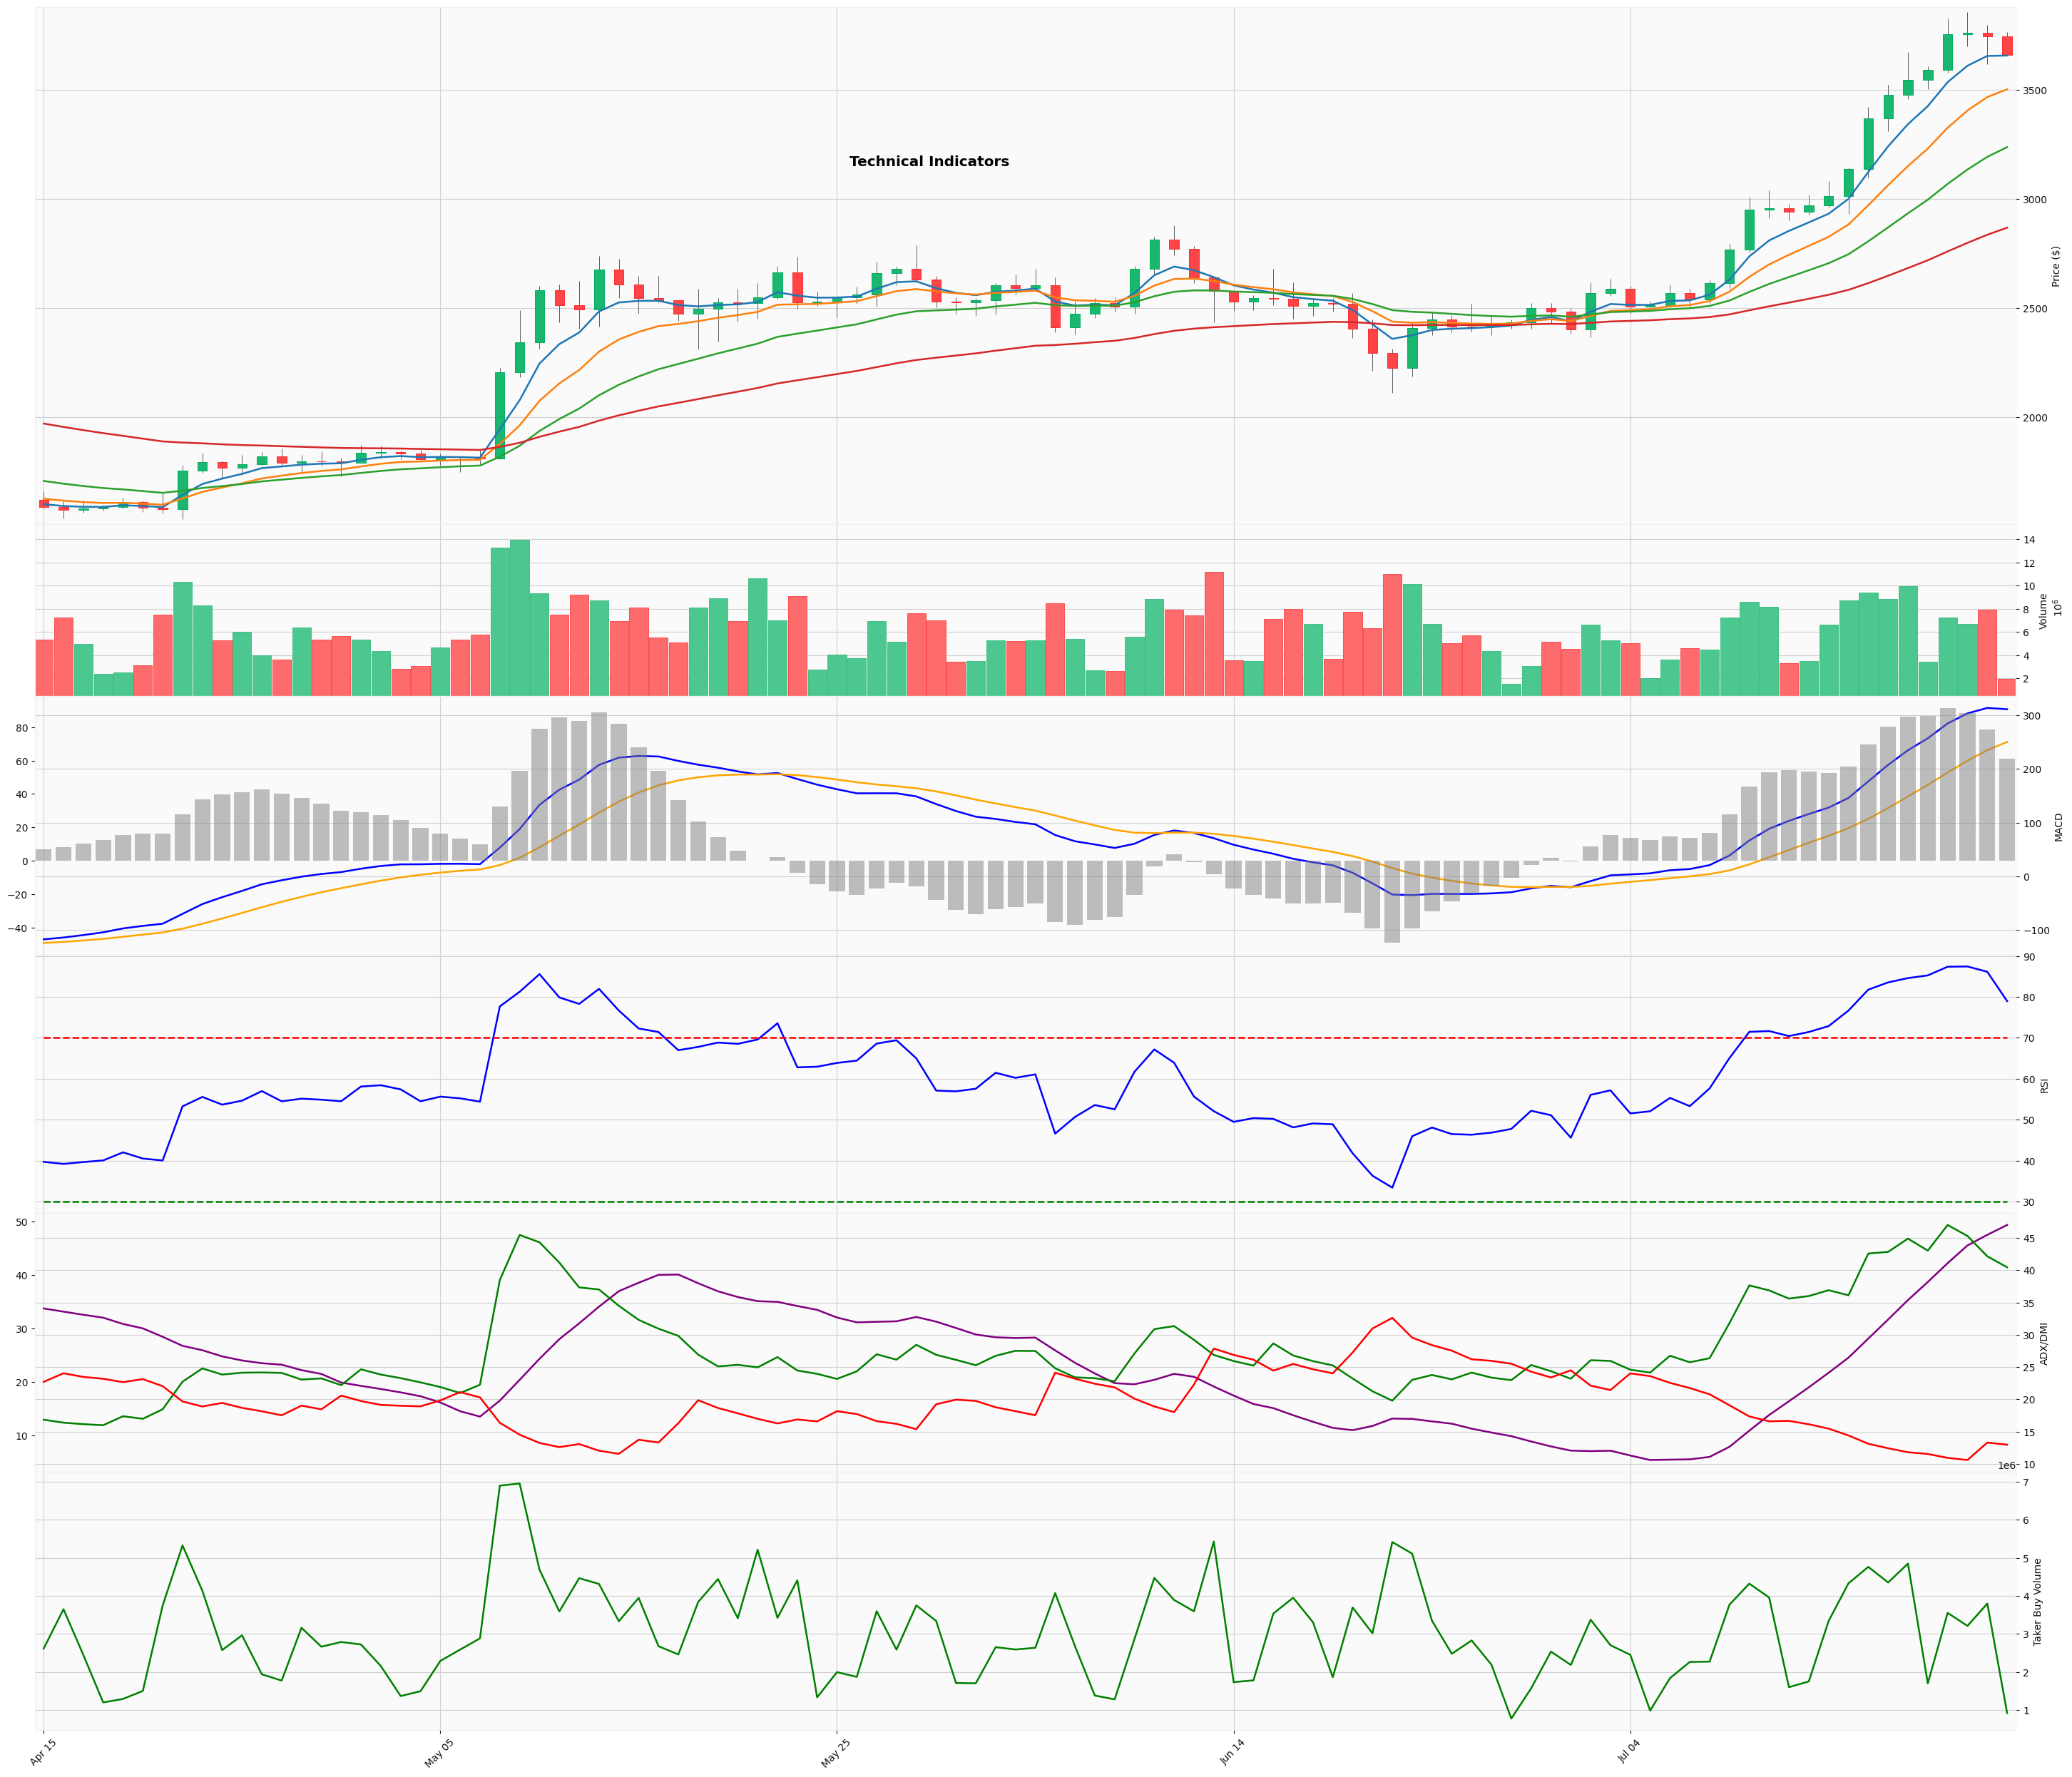

In [4]:
config = PlotConfig(
    indicators=["macd", "rsi", "adx", "taker_buy"],
    ema_periods=(5, 10, 20, 50),
    limit=100,
)
plot_candlestick_with_indicators(df_with_indicators, config=config)